result: 'ny' with 78% confidence


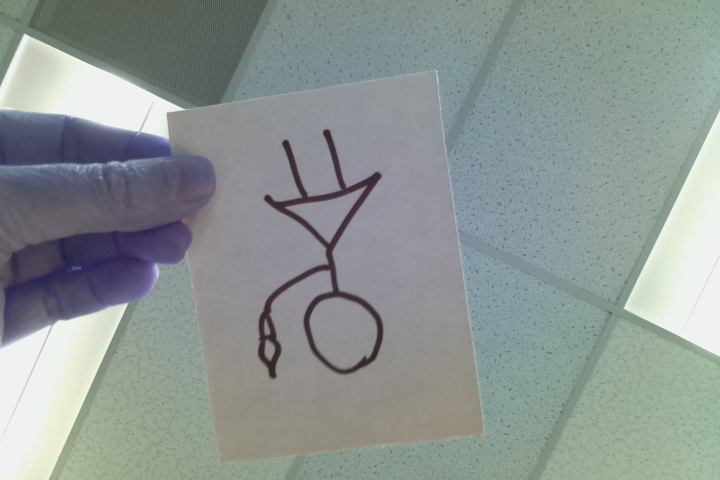

In [17]:
import requests
import base64

# Gets the contents of an image file to be sent to the
# machine learning model for classifying
def getImageFileData(locationOfImageFile):
    with open(locationOfImageFile, "rb") as f:
        data = f.read()
        #return data.encode("base64")
        return base64.b64encode(data)

# This function will pass your image to the machine learning model
# and return the top result with the highest confidence
def classify(imagefile):
    key = "a45c5be0-d1a7-11e8-8f53-25211ecbb3cf064b0bfe-f636-4642-9958-1cb7226a9dcf"
    url = "https://machinelearningforkids.co.uk/api/scratch/"+ key + "/classify"

    response = requests.post(url, json={ "data" : getImageFileData(imagefile) })

    if response.ok:
        responseData = response.json()
        topMatch = responseData[0]
        return topMatch
    else:
        response.raise_for_status()
        
def takePhoto():
    from picamera import PiCamera
    camera = PiCamera()
    camera.capture("hi.jpg")
    camera.close()

def displayPhoto():
    import cv2
    import IPython.display 
    import PIL.Image
    # Load the image and display it here
    image = cv2.imread("hi.jpg")
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    IPython.display.display(PIL.Image.fromarray(image))


# CHANGE THIS to the name of the image file you want to classify
takePhoto()

demo = classify("hi.jpg")

label = demo["class_name"]
confidence = demo["confidence"]

# CHANGE THIS to do something different with the result
print ("result: '%s' with %d%% confidence" % (label, confidence))

displayPhoto()

